In [83]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [84]:
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format

### Load and prepare currencies file (base USD)
*run load_exchange_rates.py to generate history rates csv file*

In [85]:
currency_df = pd.read_csv('usd_monthly_hist.csv', index_col=0)
currency_df.index = pd.to_datetime(currency_df.index, format='%d/%m/%Y')
currency_df.sort_index(inplace=True)
currency_df.head()

,AFN,DZD,AOA,ARS,AMD,AZN,BDT,INR,BYR,XOF,...,THB,TRY,UGX,UAH,TZS,VEF,VND,YER,ZMW,ZWL
2010-01-05,45.51,71.79,89.28,3.80,377.86,0.80,69.08,46.20,NaN,456.14,...,33.16,1.47,1917.59,8.00,1334.00,NaN,18518.50,206.19,NaN,NaN
2010-01-06,45.49,71.80,89.40,3.80,377.86,0.80,69.20,45.96,NaN,456.21,...,33.16,1.48,1916.98,8.01,1333.90,NaN,18518.50,206.12,NaN,NaN
2010-01-07,45.52,71.90,89.40,3.81,377.86,0.80,69.25,45.71,NaN,457.43,...,33.16,1.47,1917.16,8.03,1333.72,NaN,18518.50,206.04,NaN,NaN
2010-01-08,45.49,72.07,89.50,3.80,377.86,0.80,69.19,45.71,NaN,456.74,...,33.16,1.47,1922.18,8.03,1333.88,NaN,18518.50,206.13,NaN,NaN
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# drop columns and rows without values
currency_df.dropna(axis=1, how='all', inplace=True)
currency_df.dropna(axis=0, how='all', inplace=True)

In [87]:
# group by month and infere avg month currency
currency_df = currency_df.groupby(by=[currency_df.index.year, currency_df.index.month]).mean()
currency_df.index = currency_df.index.set_names(['year', 'month'])
currency_df= currency_df.reset_index()
currency_df.head()

,year,month,AFN,DZD,AOA,ARS,AMD,AZN,BDT,INR,...,TJS,THB,TRY,UGX,UAH,TZS,VND,YER,ZMW,ZWL
0,2010,1,45.49,72.02,89.78,3.80,377.67,0.80,69.15,45.87,...,4.37,33.04,1.47,1937.98,8.06,1341.77,18516.98,205.67,NaN,NaN
1,2010,2,45.41,72.97,90.25,3.85,380.08,0.80,69.19,46.32,...,4.37,33.14,1.52,1995.71,8.02,1348.79,18644.14,205.46,NaN,382.06
2,2010,3,46.15,72.90,91.20,3.86,393.32,0.80,69.28,45.48,...,4.37,32.51,1.53,2084.07,7.96,1356.20,18857.76,206.09,NaN,380.18
3,2010,4,46.08,73.21,93.64,3.87,395.11,0.80,69.18,44.47,...,4.37,32.29,1.49,2082.67,7.92,1368.44,18937.67,206.72,NaN,380.20
4,2010,5,45.91,74.33,92.78,3.90,385.15,0.80,69.32,45.84,...,4.37,32.39,1.55,2176.08,7.93,1426.51,18893.06,214.03,NaN,380.19


In [88]:
# month avg UAH
currency_df.loc[:, ['year', 'month', 'UAH']]

,year,month,UAH
0,2010,1,8.06
1,2010,2,8.02
2,2010,3,7.96
3,2010,4,7.92
4,2010,5,7.93
...,...,...,...
139,2021,8,26.78
140,2021,9,26.74
141,2021,10,26.36
142,2021,11,26.50


In [89]:
# add USD column with constant rate 1
currency_df['USD'] = 1

In [90]:
# transform to convience format
currency_df = pd.melt(currency_df, id_vars=['year', 'month'], var_name='currency', value_name='rate')
currency_df.head()

,year,month,currency,rate
0,2010,1,AFN,45.49
1,2010,2,AFN,45.41
2,2010,3,AFN,46.15
3,2010,4,AFN,46.08
4,2010,5,AFN,45.91


### Load food prices file

In [91]:
prices_df = pd.read_csv('global_food_prices.csv', low_memory=False)
prices_df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,1,2014,50.00,NaN
1,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,2,2014,50.00,NaN
2,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,3,2014,50.00,NaN
3,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,4,2014,50.00,NaN
4,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,5,2014,50.00,NaN


### Join food prices dataframe with currencies rates dataframe by year, month and currency

In [92]:
df = pd.merge(prices_df, currency_df,
         how='left',
         left_on=['mp_year','mp_month', 'cur_name'], right_on = ['year','month', 'currency'])

In [93]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,...,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,year,month,currency,rate
0,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,...,5,KG,1,2014,50.00,NaN,2014.00,1.00,AFN,55.83
1,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,...,5,KG,2,2014,50.00,NaN,2014.00,2.00,AFN,56.36
2,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,...,5,KG,3,2014,50.00,NaN,2014.00,3.00,AFN,56.49
3,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,...,5,KG,4,2014,50.00,NaN,2014.00,4.00,AFN,56.24
4,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,...,5,KG,5,2014,50.00,NaN,2014.00,5.00,AFN,56.10


### Prepare data

In [94]:
# remove duplicated columns
df.drop(['year', 'month', 'currency'], axis=1, inplace=True)

In [95]:
# remove _id columns
id_columns = [column for column in df.columns if column.endswith("_id")]
df.drop(id_columns, axis=1, inplace=True)

In [96]:
# Add usa_price column
df['usa_price'] = df['mp_price'] * df['rate']

In [97]:
# UAH prices
df[(df['cur_name'] == 'UAH')].loc[:, ['mp_year','rate', 'mp_price', 'usa_price']]

,mp_year,rate,mp_price,usa_price
1884657,2014,10.01,8.66,86.65
1884658,2014,11.65,9.40,109.54
1884659,2014,11.77,9.90,116.43
1884660,2014,11.84,10.26,121.42
1884661,2014,11.79,10.29,121.33
...,...,...,...,...
1913743,2017,25.96,35.10,911.22
1913744,2017,26.14,44.67,1167.70
1913745,2017,26.65,49.38,1315.84
1913746,2017,26.70,51.89,1385.40


In [98]:
# Distince countries
df['adm0_name'].value_counts().to_frame()

,count
adm0_name,
Rwanda,137746
Bassas da India,137093
Syrian Arab Republic,116588
Philippines,82099
Mali,73843
...,...
Viet Nam,275
Azerbaijan,125
Eritrea,100


In [99]:
# Distinct markets
df['mkt_name'].value_counts().to_frame()

,count
mkt_name,
National Average,19748
Bogota,5798
Khujand,5270
Dushanbe,5270
Gharm,5241
...,...
Faya,2
Socogim,2
Vigwagwa,1


In [100]:
# unique goods
u = list(df['cm_name'].unique())
u.sort()
u[:10]

['Alcohol (spray) - Retail',
 'Anchovies - Retail',
 'Apples (dried) - Retail',
 'Apples (red) - Retail',
 'Apples (red) - Wholesale',
 'Apples - Retail',
 'Apples - Wholesale',
 'Avocados - Retail',
 'Avocados - Wholesale',
 'Bananas (imported) - Retail']

In [101]:
# Distinct markets
df[df['mp_year'] == 1991]

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource,rate,usa_price
1247907,Niger,Agadez,Agadez Commune,Rice (imported) - Retail,XOF,Retail,KG,1,1991,200.00,NaN,NaN,NaN
1247908,Niger,Agadez,Agadez Commune,Rice (imported) - Retail,XOF,Retail,KG,2,1991,200.00,NaN,NaN,NaN
1247909,Niger,Agadez,Agadez Commune,Rice (imported) - Retail,XOF,Retail,KG,3,1991,200.00,NaN,NaN,NaN
1247910,Niger,Agadez,Agadez Commune,Rice (imported) - Retail,XOF,Retail,KG,4,1991,200.00,NaN,NaN,NaN
1247911,Niger,Agadez,Agadez Commune,Rice (imported) - Retail,XOF,Retail,KG,5,1991,200.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301222,Niger,Zinder,Zinder Commune,Millet - Retail,XOF,Retail,KG,8,1991,73.00,NaN,NaN,NaN
1301223,Niger,Zinder,Zinder Commune,Millet - Retail,XOF,Retail,KG,9,1991,70.00,NaN,NaN,NaN
1301224,Niger,Zinder,Zinder Commune,Millet - Retail,XOF,Retail,KG,10,1991,46.00,NaN,NaN,NaN
1301225,Niger,Zinder,Zinder Commune,Millet - Retail,XOF,Retail,KG,11,1991,46.00,NaN,NaN,NaN


In [102]:
# Diff between retail exchange rate and history bank exchange rate
df[(df['cm_name'].str.contains('Exchange rate'))].loc[:, ['cur_name', 'mp_price', 'rate']]

,cur_name,mp_price,rate
665,AFN,57.55,56.36
666,AFN,56.60,56.65
667,AFN,56.62,55.89
668,AFN,57.00,56.31
669,AFN,57.38,57.17
...,...,...,...
1996823,YER,589.02,250.24
1996824,YER,592.54,250.38
1996825,YER,598.16,250.40
1996826,YER,593.24,250.37


In [103]:
# Countries currencies
pd.crosstab(df["adm0_name"],
            df["cur_name"],
            )

cur_name,AFN,AMD,AOA,ARS,AZN,BDT,BIF,BOB,BTN,BYR,...,UGX,USD,VEF,VND,XAF,XOF,YER,ZAR,ZMW,ZWL
adm0_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,15427,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,1272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,20600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
Viet Nam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,275,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,36806,0,0,0


In [104]:
(df[df['um_name']=='USD/LCU']).groupby('adm0_name')['cur_name'].first().to_frame()

,cur_name
adm0_name,
Afghanistan,AFN
Armenia,AMD
Chad,XAF
Democratic Republic of the Congo,CDF
Ethiopia,ETB
Iraq,IQD
Lebanon,LBP
Liberia,LRD
Libya,LYD


In [105]:
df[df['cm_name'].str.contains('Bread')].groupby('cm_name')['cm_name'].first().values

array(['Bread (bakery) - Retail',
       'Bread (bakery, parallel market) - Retail',
       'Bread (brotchen) - Retail', 'Bread (brown) - Retail',
       'Bread (common) - Retail', 'Bread (first grade flour) - Retail',
       'Bread (high grade flour) - Retail', 'Bread (khoboz) - Retail',
       'Bread (pita) - Retail', 'Bread (rye) - Retail',
       'Bread (shop) - Retail', 'Bread (traditional) - Retail',
       'Bread (vetkoek) - Retail', 'Bread (wheat) - Retail',
       'Bread - Retail'], dtype=object)

In [106]:
df = df[df['cm_name'].str.contains('Bread') | 
        df['cm_name'].str.contains('Milk') | 
        df['cm_name'].str.contains('Meat') | 
        df['cm_name'].str.contains('Fish') | 
        df['cm_name'].str.contains('Rice') |
        df['cm_name'].str.contains('Water') |
        df['cm_name'].str.contains('Exchange rate')]
df

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource,rate,usa_price
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.00,NaN,55.83,2791.66
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.00,NaN,56.36,2818.21
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.00,NaN,56.49,2824.34
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.00,NaN,56.24,2812.06
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.00,NaN,56.10,2804.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Midlands,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,12,2020,1187.50,NaN,NaN,NaN
2050626,Zimbabwe,Midlands,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,2,2021,1123.33,NaN,NaN,NaN
2050627,Zimbabwe,Midlands,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,3,2021,1390.00,NaN,NaN,NaN
2050628,Zimbabwe,Midlands,Mbilashaba,Rice - Retail,ZWL,Retail,KG,6,2021,110.62,NaN,NaN,NaN


In [107]:
# Goods list
u = list(df['cm_name'].unique())
u.sort()
u[:10]

['Bread (bakery) - Retail',
 'Bread (bakery, parallel market) - Retail',
 'Bread (brotchen) - Retail',
 'Bread (brown) - Retail',
 'Bread (common) - Retail',
 'Bread (first grade flour) - Retail',
 'Bread (high grade flour) - Retail',
 'Bread (khoboz) - Retail',
 'Bread (pita) - Retail',
 'Bread (rye) - Retail']

In [108]:
# Handle extra information
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x)[:str(x).find(' -')] )
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x) if str(x).find(' (') == -1 else str(x)[:str(x).find(' (')] )
df

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource,rate,usa_price
0,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00,NaN,55.83,2791.66
1,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00,NaN,56.36,2818.21
2,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00,NaN,56.49,2824.34
3,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00,NaN,56.24,2812.06
4,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00,NaN,56.10,2804.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Midlands,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50,NaN,NaN,NaN
2050626,Zimbabwe,Midlands,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33,NaN,NaN,NaN
2050627,Zimbabwe,Midlands,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00,NaN,NaN,NaN
2050628,Zimbabwe,Midlands,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62,NaN,NaN,NaN


In [109]:
df['cm_name'].unique()

array(['Bread', 'Rice', 'Exchange rate', 'Milk', 'Meat', 'Fish',
       'Water spinach', 'Water', 'Watermelons'], dtype=object)

In [110]:
# Unique markets
df['pt_name'].unique()

array(['Retail', 'Wholesale', 'Producer', 'Farm Gate'], dtype=object)

In [111]:
# units
pd.crosstab(df["um_name"],
            df["cm_name"],
            )

cm_name,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water,Water spinach,Watermelons
um_name,,,,,,,,,
0.8 KG,0,0,0,0,552,0,0,0,0
1.1 KG,7913,0,0,0,0,0,0,0,0
1.2 KG,0,0,526,0,0,0,0,0,0
1.4 KG,0,0,0,0,0,1946,0,0,0
1.5 KG,0,0,472,0,0,0,0,0,0
1.5 L,0,0,0,0,0,0,825,0,0
1.8 KG,0,0,0,0,711,0,0,0,0
10 KG,0,0,0,364,0,108,0,0,0
100 KG,0,0,0,0,0,8604,0,0,0


In [112]:
d = {'KG': 1,
 'Unit': 1,
 'Pound': 0.45,
 '400 G': 0.4,
 '150 G': 0.15,
 '5 pcs': 1,
 '500 G': 0.5,
 '700 G': 0.7,
 '800 G': 0.8,
 '1.1 KG': 1.1,
 'Libra': 0.45,
 '900 G': 0.9,
 '100 KG': 100,
 '46 KG': 46,
 'Cuartilla': 2.88,
 '90 KG': 90,
 '120 KG': 120,
 '50 KG': 50,
 'MT': 1000,
 '45 KG': 45,
 '84 KG': 84,
 '100 Pounds': 45,
 'Marmite': 1,
 '5 KG': 5,
 '10 KG': 10,
 '1.4 KG': 1.4,
 '25 KG': 25,
 '2 KG': 2,
 'Loaf' : 1,
 '50 Pounds': 22.5,
 '380 G': 0.38,
 '500 ML': 0.5,
 '385 G': 0.385,
 '0.8 KG': 0.8,
 '200 ML': 0.2,
 '20 G': 0.02,
 '1.8 KG': 1.8,
 '125 G': 0.125,
 '20 KG': 20,
 '170 G': 0.17,
 '185 G': 0.185,
 '200 G': 0.2,
 '1.5 KG': 1.5,
 '1.2 KG': 1.2,
 'Bundle': 46,
 '160 G': 0.16,
 'Cubic meter': 1,
 '1.5 L': 1.5,
 'L': 1,
 'USD/LCU': 1}

In [113]:
# convert prices for kg units
df.loc[:, 'um_koef'] = df['um_name'].map(d)
df.loc[:, 'mp_price_un'] = df['mp_price'] / df['um_koef']
df.loc[:, 'usa_price_un'] = df['usa_price'] / df['um_koef']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511651 entries, 0 to 2050637
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_name           511651 non-null  object 
 1   adm1_name           368939 non-null  object 
 2   mkt_name            511651 non-null  object 
 3   cm_name             511651 non-null  object 
 4   cur_name            511651 non-null  object 
 5   pt_name             511651 non-null  object 
 6   um_name             511651 non-null  object 
 7   mp_month            511651 non-null  int64  
 8   mp_year             511651 non-null  int64  
 9   mp_price            511651 non-null  float64
 10  mp_commoditysource  0 non-null       float64
 11  rate                436422 non-null  float64
 12  usa_price           436422 non-null  float64
 13  um_koef             510675 non-null  float64
 14  mp_price_un         510675 non-null  float64
 15  usa_price_un        435446 non-null  f

In [115]:
df_res = pd.pivot_table(df, values= 'mp_price',
                        index= ['cur_name', 'adm0_name', 'mp_year', 'mp_month', 'mkt_name'], 
                        columns=['cm_name'], aggfunc='mean', margins=False)

In [116]:
df_res.columns

Index(['Bread', 'Exchange rate', 'Fish', 'Meat', 'Milk', 'Rice', 'Water',
       'Water spinach', 'Watermelons'],
      dtype='object', name='cm_name')

In [117]:
df_res = df_res[['Exchange rate', 'Bread', 'Fish', 'Meat', 'Milk', 'Rice', 'Water']]
df_res

cm_name                                                        Exchange rate  \
cur_name adm0_name   mp_year mp_month mkt_name                                 
AFN      Afghanistan 2000    1        Hirat                              NaN   
                                      Jalalabad                          NaN   
                                      Kabul                              NaN   
                                      Kandahar                           NaN   
                             2        Hirat                              NaN   
...                                                                      ...   
ZWL      Zimbabwe    2021    6        Sizinda Shopping Centre            NaN   
                                      Torwood 1                          NaN   
                                      Torwood 2                          NaN   
                                      Victoria Falls                     NaN   
                                      Zvishavane Urban                   NaN   

cm_name                                                        Bread    Fish  \
cur_name adm0_name   mp_year mp_month mkt_name                                 
AFN      Afghanistan 2000    1        Hirat                    15.63     NaN   
                                      Jalalabad                14.86     NaN   
                                      Kabul                    14.26     NaN   
                                      Kandahar                 16.25     NaN   
                             2        Hirat                    15.63     NaN   
...                                                              ...     ...   
ZWL      Zimbabwe    2021    6        Sizinda Shopping Centre    NaN     NaN   
                                      Torwood 1                  NaN 1000.00   
                                      Torwood 2                  NaN     NaN   
                                      Victoria Falls             NaN 1270.45   
                                      Zvishavane Urban           NaN 1227.70   

cm_name                                                        Meat  Milk  \
cur_name adm0_name   mp_year mp_month mkt_name                              
AFN      Afghanistan 2000    1        Hirat                     NaN   NaN   
                                      Jalalabad                 NaN   NaN   
                                      Kabul                     NaN   NaN   
                                      Kandahar                  NaN   NaN   
                             2        Hirat                     NaN   NaN   
...                                                             ...   ...   
ZWL      Zimbabwe    2021    6        Sizinda Shopping Centre   NaN   NaN   
                                      Torwood 1                 NaN   NaN   
                                      Torwood 2                 NaN   NaN   
                                      Victoria Falls            NaN   NaN   
                                      Zvishavane Urban          NaN   NaN   

cm_name                                                         Rice  Water  
cur_name adm0_name   mp_year mp_month mkt_name                               
AFN      Afghanistan 2000    1        Hirat                      NaN    NaN  
                                      Jalalabad                  NaN    NaN  
                                      Kabul                      NaN    NaN  
                                      Kandahar                   NaN    NaN  
                             2        Hirat                      NaN    NaN  
...                                                              ...    ...  
ZWL      Zimbabwe    2021    6        Sizinda Shopping Centre  82.50    NaN  
                                      Torwood 1                85.00    NaN  
                                      Torwood 2                85.00    NaN  
                                      Victoria Falls      

## Static Analisis

In [118]:
df_stat = df_res.reset_index()
df_stat

cm_name,cur_name,adm0_name,mp_year,mp_month,mkt_name,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
0,AFN,Afghanistan,2000,1,Hirat,NaN,15.63,NaN,NaN,NaN,NaN,NaN
1,AFN,Afghanistan,2000,1,Jalalabad,NaN,14.86,NaN,NaN,NaN,NaN,NaN
2,AFN,Afghanistan,2000,1,Kabul,NaN,14.26,NaN,NaN,NaN,NaN,NaN
3,AFN,Afghanistan,2000,1,Kandahar,NaN,16.25,NaN,NaN,NaN,NaN,NaN
4,AFN,Afghanistan,2000,2,Hirat,NaN,15.63,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170527,ZWL,Zimbabwe,2021,6,Sizinda Shopping Centre,NaN,NaN,NaN,NaN,NaN,82.50,NaN
170528,ZWL,Zimbabwe,2021,6,Torwood 1,NaN,NaN,1000.00,NaN,NaN,85.00,NaN
170529,ZWL,Zimbabwe,2021,6,Torwood 2,NaN,NaN,NaN,NaN,NaN,85.00,NaN
170530,ZWL,Zimbabwe,2021,6,Victoria Falls,NaN,NaN,1270.45,NaN,NaN,123.43,NaN


In [119]:
# items per country
pd.concat([df_stat["adm0_name"].value_counts(), df_stat["adm0_name"].value_counts(normalize=True)], axis=1)

,count,proportion
adm0_name,,
Mali,11774,0.07
Bassas da India,10668,0.06
Niger,9858,0.06
Senegal,7541,0.04
Rwanda,5154,0.03
...,...,...
Sudan,91,0.00
Algeria,80,0.00
Argentina,62,0.00


In [120]:
# unique countries
df_stat["adm0_name"].unique()[:10]

array(['Afghanistan', 'Armenia', 'Angola', 'Argentina', 'Azerbaijan',
       'Bangladesh', 'Burundi', 'Bolivia', 'Bhutan', 'Belarus'],
      dtype=object)

In [121]:
# Mali statistics
df_stat[df_stat['adm0_name']=='Mali'].describe()

cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,11774.00,11774.00,0.00,0.00,359.00,573.00,590.00,11774.00,0.00
mean,2014.68,6.37,NaN,NaN,1916.26,2448.63,1660.77,348.58,NaN
std,4.47,3.41,NaN,NaN,597.71,411.04,369.07,62.28,NaN
min,2003.00,1.00,NaN,NaN,300.00,825.00,662.50,120.00,NaN
25%,2010.00,3.00,NaN,NaN,1500.00,2250.00,1500.00,316.33,NaN
50%,2016.00,6.00,NaN,NaN,1980.00,2333.33,1555.00,353.50,NaN
75%,2019.00,9.00,NaN,NaN,2250.00,2666.67,1750.00,375.00,NaN
max,2021.00,12.00,NaN,NaN,4050.00,3833.33,4700.00,820.00,NaN


In [122]:
# Ukrain statistics
df_stat[df_stat['adm0_name']=='Ukraine'].describe()

cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,1165.00,1165.00,0.00,1165.00,0.00,1165.00,1165.00,1165.00,0.00
mean,2015.54,6.66,NaN,9.41,NaN,60.77,12.20,16.30,NaN
std,1.09,3.39,NaN,2.50,NaN,12.37,3.38,3.56,NaN
min,2014.00,1.00,NaN,4.39,NaN,34.90,6.81,7.76,NaN
25%,2015.00,4.00,NaN,7.54,NaN,52.44,9.20,15.16,NaN
50%,2016.00,7.00,NaN,10.00,NaN,60.80,11.64,16.65,NaN
75%,2016.00,10.00,NaN,11.03,NaN,66.44,14.88,18.29,NaN
max,2017.00,12.00,NaN,15.74,NaN,94.47,20.62,29.75,NaN


In [123]:
# India statistics
df_stat[df_stat['adm0_name']=='Bassas da India'].describe()

cm_name,mp_year,mp_month,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
count,10668.00,10668.00,0.00,0.00,0.00,0.00,6644.00,10647.00,0.00
mean,2012.04,6.40,NaN,NaN,NaN,NaN,41.10,108.24,NaN
std,7.44,3.44,NaN,NaN,NaN,NaN,9.01,290.73,NaN
min,1994.00,1.00,NaN,NaN,NaN,NaN,16.00,5.00,NaN
25%,2008.00,3.00,NaN,NaN,NaN,NaN,35.00,16.50,NaN
50%,2014.00,6.00,NaN,NaN,NaN,NaN,40.14,26.00,NaN
75%,2018.00,9.00,NaN,NaN,NaN,NaN,46.00,32.57,NaN
max,2021.00,12.00,NaN,NaN,NaN,NaN,75.00,2481.59,NaN


In [124]:
d = df_stat[df_stat['adm0_name']=='Bassas da India'].groupby('mp_year') \
    .agg(milk_mean=('Milk', 'mean'), rice_mean=('Rice', 'mean'))
d

,milk_mean,rice_mean
mp_year,,
1994,NaN,7.82
1995,NaN,8.03
1996,NaN,9.05
1997,NaN,9.63
1998,NaN,10.12
1999,NaN,11.17
2000,NaN,122.81
2001,NaN,215.84
2002,NaN,114.06


## visualization

<Axes: xlabel='mp_year'>

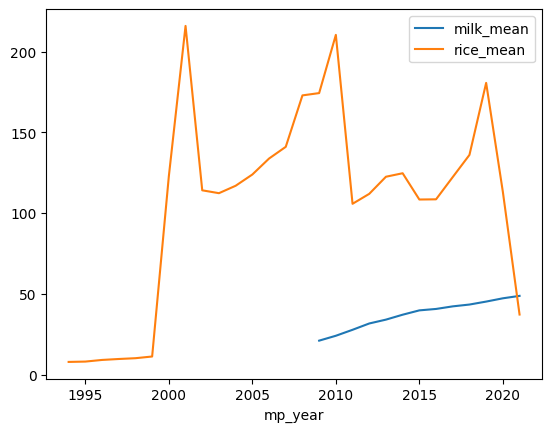

In [125]:
# India prices changes
d[['milk_mean','rice_mean']].plot()

In [126]:
# Ukrainian prices
d = df_stat[df_stat['adm0_name']=='Ukraine'].groupby('mp_year') \
    .agg(bread_mean=('Bread', 'mean'), meat_mean=('Meat', 'mean'), milk_mean=('Milk', 'mean'), rice_mean=('Rice', 'mean'))
d

,bread_mean,meat_mean,milk_mean,rice_mean
mp_year,,,,
2014,5.61,44.40,8.25,11.06
2015,9.29,58.43,10.35,19.13
2016,10.24,61.82,12.90,15.94
2017,12.02,76.76,17.00,18.29


<Axes: xlabel='mp_year'>

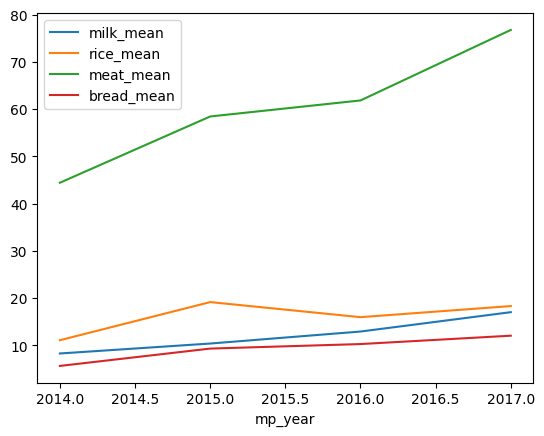

In [127]:
d[['milk_mean','rice_mean', 'meat_mean', 'bread_mean']].plot()

In [128]:
# China rice prices
# Ukrainian prices
d = df_stat[df_stat['adm0_name']=='China'].groupby('mp_year') \
    .agg(rice_mean=('Rice', 'mean'))
d

,rice_mean
mp_year,
2014,4.33
2015,4.41
2016,4.41
2017,4.45
2018,4.52
2019,4.42
2020,4.10


<Axes: xlabel='mp_year'>

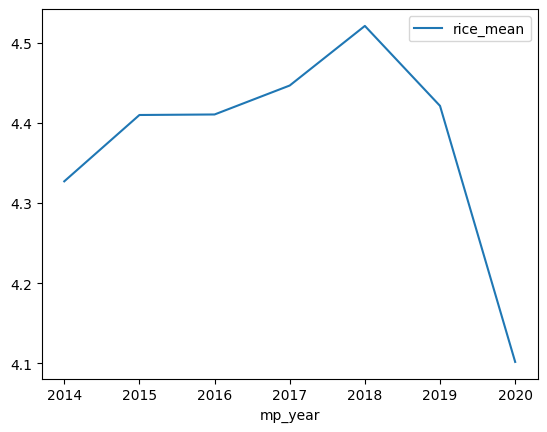

In [129]:
d[['rice_mean']].plot()

          rice_mean
mkt_name           
Hangzhou       4.25
Hubei          4.01
Jiujiang       4.12
Wuhan          4.66
Yuncheng       4.88


<Axes: xlabel='mkt_name'>

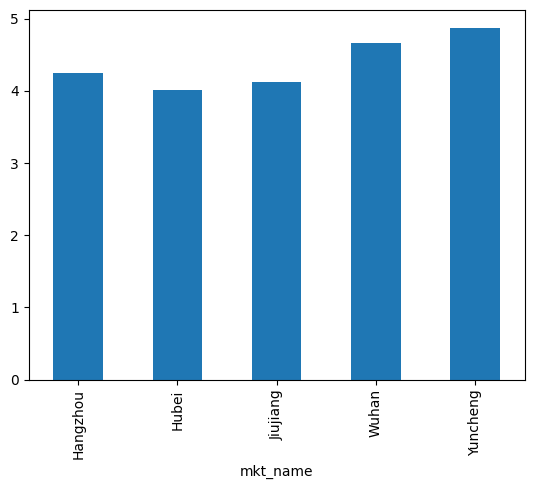

In [130]:
# group by market
d = df_stat[df_stat['adm0_name']=='China'].groupby(['mkt_name']).agg(rice_mean=('Rice', 'mean'))
print(d)
d['rice_mean'].plot.bar()

<Axes: ylabel='rice_mean'>

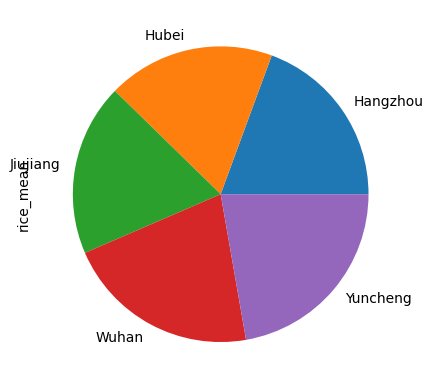

In [131]:
d['rice_mean'].plot.pie()

mkt_name  Hangzhou  Hubei  Jiujiang  Wuhan  Yuncheng
mp_year                                             
2014          4.31   3.90      4.17   4.50      4.75
2015          4.38   3.95      4.20   4.69      4.84
2016          4.14   4.11      4.17   4.80      4.82
2017          4.22   4.22      4.17   4.79      4.84
2018          4.33   4.10      4.07   4.83      5.27
2019          4.16   3.96      4.09   4.66      5.23
2020          4.19   3.80      3.95   4.29      4.28


<Axes: xlabel='mp_year'>

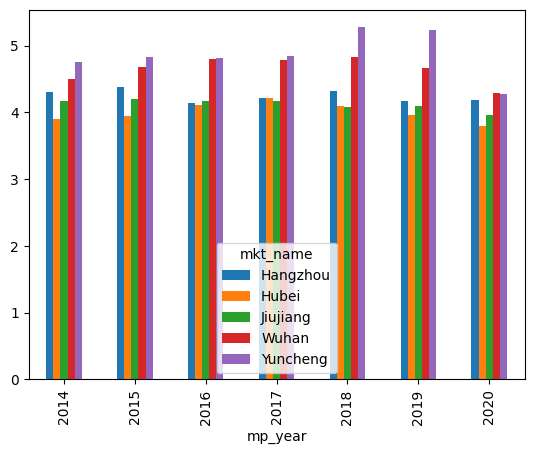

In [132]:
# Market price change per year
d = df_stat[df_stat['adm0_name']=='China']
d = d[['mkt_name', 'mp_year', 'Rice']]
d = pd.pivot_table(d, values= 'Rice', index= ['mp_year'], columns='mkt_name', aggfunc='mean', margins=False)
print(d)
d.plot.bar()

In [133]:
usd_countries = list((df[(df['cur_name']=='USD')])['adm0_name'].unique())
usd_countries

['Costa Rica',
 'Ecuador',
 'El Salvador',
 'Honduras',
 'Nicaragua',
 'Panama',
 'Timor-Leste']

In [134]:
df_stat

cm_name,cur_name,adm0_name,mp_year,mp_month,mkt_name,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
0,AFN,Afghanistan,2000,1,Hirat,NaN,15.63,NaN,NaN,NaN,NaN,NaN
1,AFN,Afghanistan,2000,1,Jalalabad,NaN,14.86,NaN,NaN,NaN,NaN,NaN
2,AFN,Afghanistan,2000,1,Kabul,NaN,14.26,NaN,NaN,NaN,NaN,NaN
3,AFN,Afghanistan,2000,1,Kandahar,NaN,16.25,NaN,NaN,NaN,NaN,NaN
4,AFN,Afghanistan,2000,2,Hirat,NaN,15.63,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170527,ZWL,Zimbabwe,2021,6,Sizinda Shopping Centre,NaN,NaN,NaN,NaN,NaN,82.50,NaN
170528,ZWL,Zimbabwe,2021,6,Torwood 1,NaN,NaN,1000.00,NaN,NaN,85.00,NaN
170529,ZWL,Zimbabwe,2021,6,Torwood 2,NaN,NaN,NaN,NaN,NaN,85.00,NaN
170530,ZWL,Zimbabwe,2021,6,Victoria Falls,NaN,NaN,1270.45,NaN,NaN,123.43,NaN


In [136]:
df_stat.loc[:, 'Exchange rate'] = df_stat.apply(lambda x : 1 if x['adm0_name'] in usd_countries else x['Exchange rate'], axis=1 )

In [138]:
# drop records withou exchange rate
df_stat_multy = df_stat[df_stat['Exchange rate'].notna()]
df_stat_multy

cm_name,cur_name,adm0_name,mp_year,mp_month,mkt_name,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water
1039,AFN,Afghanistan,2014,2,Fayzabad,57.55,50.00,NaN,NaN,NaN,50.00,NaN
1040,AFN,Afghanistan,2014,2,Hirat,57.65,29.40,NaN,NaN,NaN,25.40,NaN
1041,AFN,Afghanistan,2014,2,Jalalabad,57.70,33.30,NaN,NaN,NaN,48.38,NaN
1042,AFN,Afghanistan,2014,2,Kabul,57.67,38.50,NaN,NaN,NaN,50.00,NaN
1043,AFN,Afghanistan,2014,2,Kandahar,58.25,37.00,NaN,NaN,NaN,24.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
164761,YER,Yemen,2021,6,Sana'a City,595.67,NaN,NaN,NaN,NaN,1000.00,NaN
164762,YER,Yemen,2021,6,Sayoun City,933.93,NaN,NaN,NaN,NaN,1000.00,NaN
164763,YER,Yemen,2021,6,Soqatra (Hudaibo),932.00,NaN,NaN,NaN,NaN,1100.00,NaN
164764,YER,Yemen,2021,6,Taiz City,929.48,NaN,NaN,NaN,NaN,1375.00,NaN


In [139]:
df_stat_multy["adm0_name"].value_counts().to_frame()

,count
adm0_name,
Democratic Republic of the Congo,1991
Syrian Arab Republic,1986
El Salvador,1594
Yemen,1419
Somalia,1284
Afghanistan,1070
Liberia,1024
Ecuador,864
Nicaragua,705


In [141]:
len(df_stat_multy["adm0_name"].value_counts())

23

In [143]:
# Add usd price
df_stat_multy.loc[:, 'Rice_USD'] = df_stat_multy['Rice'] / df_stat_multy['Exchange rate']
df_stat_multy

cm_name,cur_name,adm0_name,mp_year,mp_month,mkt_name,Exchange rate,Bread,Fish,Meat,Milk,Rice,Water,Rice_USD
1039,AFN,Afghanistan,2014,2,Fayzabad,57.55,50.00,NaN,NaN,NaN,50.00,NaN,0.87
1040,AFN,Afghanistan,2014,2,Hirat,57.65,29.40,NaN,NaN,NaN,25.40,NaN,0.44
1041,AFN,Afghanistan,2014,2,Jalalabad,57.70,33.30,NaN,NaN,NaN,48.38,NaN,0.84
1042,AFN,Afghanistan,2014,2,Kabul,57.67,38.50,NaN,NaN,NaN,50.00,NaN,0.87
1043,AFN,Afghanistan,2014,2,Kandahar,58.25,37.00,NaN,NaN,NaN,24.38,NaN,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164761,YER,Yemen,2021,6,Sana'a City,595.67,NaN,NaN,NaN,NaN,1000.00,NaN,1.68
164762,YER,Yemen,2021,6,Sayoun City,933.93,NaN,NaN,NaN,NaN,1000.00,NaN,1.07
164763,YER,Yemen,2021,6,Soqatra (Hudaibo),932.00,NaN,NaN,NaN,NaN,1100.00,NaN,1.18
164764,YER,Yemen,2021,6,Taiz City,929.48,NaN,NaN,NaN,NaN,1375.00,NaN,1.48


In [144]:
df_stat_multy = pd.pivot_table(df_stat_multy, values= 'Rice_USD', index= ['mp_year'],
                               columns='adm0_name', aggfunc='mean', margins=False)
df_stat_multy

adm0_name,Afghanistan,Costa Rica,Democratic Republic of the Congo,Ecuador,El Salvador,Ethiopia,Honduras,Iraq,Liberia,Nicaragua,Panama,Somalia,South Sudan,Syrian Arab Republic,Tajikistan,Timor-Leste,Yemen
mp_year,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,0.59,26.97,NaN,NaN,NaN,NaN,418.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,0.55,26.13,NaN,NaN,NaN,NaN,459.44,13.96,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,711.67,NaN,0.62,29.42,NaN,585.39,NaN,NaN,537.04,200.94,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,847.75,NaN,0.81,45.14,NaN,889.00,NaN,NaN,850.80,490.62,NaN,NaN,NaN,NaN,0.74,NaN


<Axes: xlabel='mp_year'>

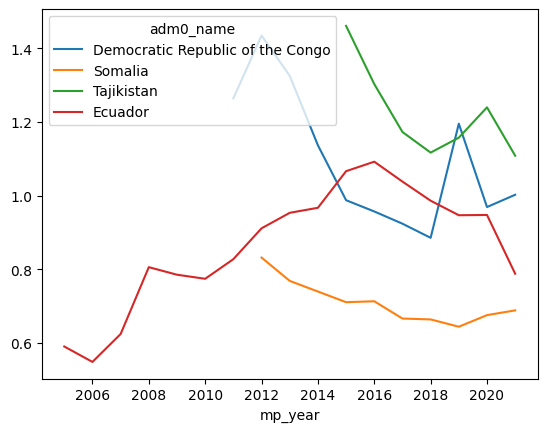

In [145]:
# Countries price dynamic
df_stat_multy = df_stat_multy[['Democratic Republic of the Congo','Somalia', 'Tajikistan', 'Ecuador']]
df_stat_multy.plot()

<Axes: xlabel='mp_year'>

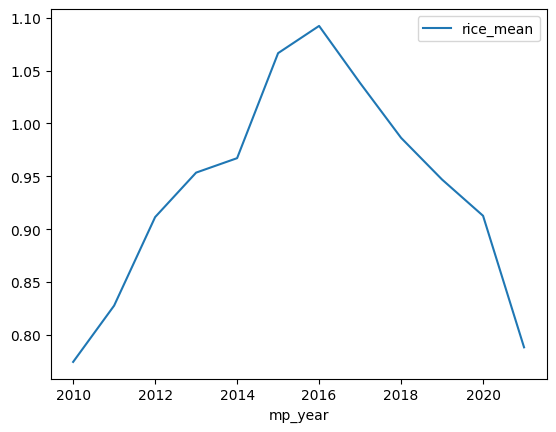

In [150]:
# Ecuador usd prices with bank rate
df[(df['adm0_name'] == 'Ecuador') & (df['cm_name'] == 'Rice')]\
    .groupby(['mp_year'])\
    .agg(rice_mean=('usa_price_un', 'mean')).plot()